In [69]:
import numpy as np
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
path_problem='C:/Users/anton/Documents/Master2/Memoire/Scripts/precip/data_for_brussels/2024/download_precip_Bruxelles_2024_05.nc'
data_problem = nc.Dataset(path_problem)
data_problem.variables['tp'][:,0,0].flatten()

masked_array(data=[6.675044960500337e-05, 0.00024282879609392174,
                   0.0003351257140662722, 0.00020464644014702685,
                   2.5381652442396435e-05, 0.0, 0.0, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --

In [71]:
year_of_interest = '2024' 

In [72]:
if year_of_interest == '2024':
    path='C:/Users/anton/Documents/Master2/Memoire/Scripts/ERA5_2024/c52e3bb84232a321fc247eeee3740f35.nc'
else:
    path = f'C:/Users/anton/Documents/Master2/Memoire/Scripts/precip/data_for_brussels/all_years/download_precip_Bruxelles_{year_of_interest}.nc'

data = nc.Dataset(path)

In [73]:
if year_of_interest == '2024':
    hourly_data = data['tp'][:,2,1]    # 2,1 is the index of Brussels in the grid   latitude = +-50.5, longitude = +-4.25    
else:
    hourly_data = data['tp'][:,0,0]

# Create a DataFrame with the hourly data
df = pd.DataFrame(hourly_data, columns=['value'])
# Create a date range for the period covered by your data
date_range = pd.date_range(start=f'{year_of_interest}-01-01', periods=len(hourly_data),freq='H')
# Assign the date range to the DataFrame as an index
df.index = date_range
# Resample the data by month and aggregate (e.g., sum, mean)
monthly_data = df.resample('M').sum()  # You can also use .mean(), .max(), etc.

monthly_array = np.array([[month, value[0]] for month, value in monthly_data.iterrows()])


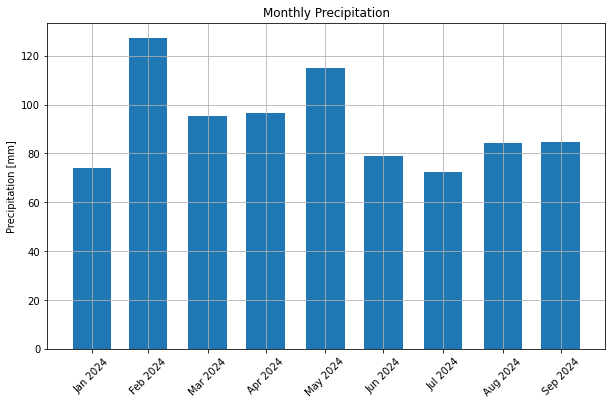

In [74]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_data.index, monthly_data['value']*1000,width=20)
plt.ylabel('Precipitation [mm]')
plt.title('Monthly Precipitation')
plt.grid()
plt.xticks(monthly_data.index, monthly_data.index.strftime('%b %Y'), rotation=45)
plt.show()

In [75]:
first_year=1959
last_year=2024
years=np.linspace(first_year,last_year,last_year-first_year+1)

In [76]:
all_years = os.listdir('C:/Users/anton/Documents/Master2/Memoire/Scripts/precip/data_for_brussels/all_years')
historic_precipitation=[]

for year in all_years:
    yearly_data=nc.Dataset(f'C:/Users/anton/Documents/Master2/Memoire/Scripts/precip/data_for_brussels/all_years/{year}')
    year_len=len(yearly_data['tp'][:,0,0])
    total_precipitation = yearly_data['tp'][0:int(year_len/2)+61*24,0,0].sum()
    historic_precipitation.append(total_precipitation)

year2024_path='C:/Users/anton/Documents/Master2/Memoire/Scripts/ERA5_2024/c52e3bb84232a321fc247eeee3740f35.nc'
data2024 = nc.Dataset(year2024_path)
hourly_data2024_sum = data2024['tp'][:,2,1].sum()
historic_precipitation.append(hourly_data2024_sum)
#sum2024_IRM=0.082+0.1265+0.0792+0.0811+0.1249+0.0732+0.0972+0.1529   #données de l'IRM pour janvier-août (inclus)
#historic_precipitation.append(sum2024_IRM)
print(hourly_data2024_sum)


0.8289323


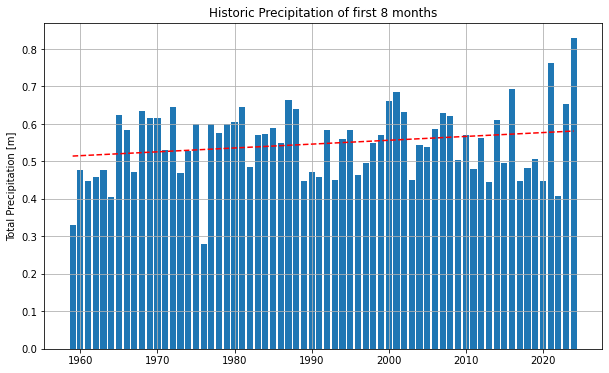

In [77]:
plt.figure(figsize=(10, 6))
plt.bar(years, historic_precipitation)
plt.ylabel('Total Precipitation [m]')
plt.title('Historic Precipitation of first 8 months')
plt.grid()
#z = np.polyfit(years, historic_precipitation, 1)
#p = np.poly1d(z)
plt.plot(years, p(years), "r--", label='Trendline')

plt.show()